<a href="https://colab.research.google.com/github/AlfarizhiFitra/DIF62130_KelasB_25_2311533014/blob/main/Praktikum%201/%20SimpleLinierRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

data = {
    'luas': [6, 8, 10, 14, 18],
    'harga': [7, 9, 13, 17.5, 18]
}

df = pd.DataFrame(data)
print(df)


   luas  harga
0     6    7.0
1     8    9.0
2    10   13.0
3    14   17.5
4    18   18.0


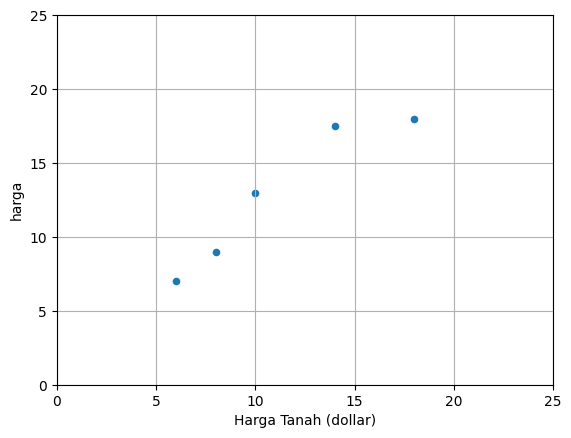

In [9]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='luas',y='harga')
plt.xlabel('luas tanah (m persegi)')
plt.xlabel('Harga Tanah (dollar)')
plt.xlim(0, 25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [31]:
import numpy as np
X=np.array(df['luas'])
Y=np.array(df['harga'])

print(f'X shape: {X.shape}')
print(f'Y shape: {Y.shape}')

X shape: (5,)
Y shape: (5,)


In [12]:
X = X.reshape(-1, 1)

print(f'X shape: {X.shape}')
print(f'X: {X}')

X shape: (5, 1)
X: [[ 6]
 [ 8]
 [10]
 [14]
 [18]]


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [20]:
X_vis = np.array([0,25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

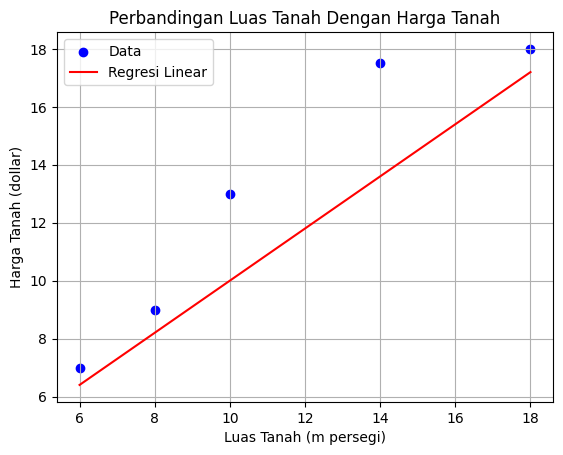

In [35]:
plt.scatter(X, Y, label="Data", color="blue")

plt.plot(x_vis, y_vis, color='red', label="Regresi Linear")

plt.title('Perbandingan Luas Tanah Dengan Harga Tanah')
plt.xlabel('Luas Tanah (m persegi)')
plt.ylabel('Harga Tanah (dollar)')
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


In [36]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_[0]}')

intercept: 1.965517241379315
slope: 0.9762931034482755


In [32]:
luas_tanah = np.array([12,15,20]).reshape(-1,1)
print(luas_tanah.shape)
luas_tanah

(3, 1)


array([[12],
       [15],
       [20]])

In [34]:
harga_prediksi = model.predict(luas_tanah)
harga_prediksi

array([13.68103448, 16.60991379, 21.49137931])

In [37]:
for luas, hrg in zip(luas_tanah, harga_prediksi):
  print(f'Luas Tanah {luas}: harga prediksi: {hrg}')

Luas Tanah [12]: harga prediksi: 13.681034482758621
Luas Tanah [15]: harga prediksi: 16.609913793103445
Luas Tanah [20]: harga prediksi: 21.491379310344826


# **Evaluasi Simple Linear Regression Model**

In [49]:
x_train = np.array([6, 8, 10, 14, 18]).reshape(-1,1)
y_train = np.array([7, 9, 13, 17.5, 18])

x_test = np.array([9, 9, 11, 16, 12]).reshape(-1,1)
y_test = np.array([11, 8.5, 15, 18, 11])

# **Training Simple Linear Regression**

In [50]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

evaluasi Linear Regression MOdel dengan Coefficient of Determination atau R-squered

In [51]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6873061136400747


In [52]:
y_pred

array([10.75215517, 10.75215517, 12.70474138, 17.5862069 , 13.68103448])

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

In [59]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(data= housing.data, columns=housing.feature_names)
df['MedHouseValue'] = pd.Series(housing.target)

targets=df['MedHouseValue']
inputs=df.drop('MedHouseValue', axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# **Data** **Preprocession**

In [66]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape)
print( y_train.shape, y_test.shape)

(14448, 8) (6192, 8)
(14448,) (6192,)


In [67]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_test)

[[1.89659453e-01 7.45098039e-01 2.59249620e-02 ... 8.26699958e-04
  1.61530287e-01 5.94594595e-01]
 [1.01964111e-01 7.05882353e-01 2.93658328e-02 ... 1.49655077e-03
  4.50584485e-01 4.52452452e-01]
 [2.42293210e-01 8.82352941e-01 2.57625553e-02 ... 2.43712035e-03
  5.51540914e-01 1.88188188e-01]
 ...
 [1.43901463e-01 9.01960784e-01 2.71911561e-02 ... 1.63065424e-03
  5.92986185e-01 2.05205205e-01]
 [1.45508338e-01 2.35294118e-01 2.97484189e-02 ... 1.59782455e-03
  5.87672689e-01 2.06206206e-01]
 [8.33367816e-02 5.49019608e-01 1.45501245e-02 ... 1.74904890e-03
  1.65781084e-01 6.00600601e-01]]


In [68]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [69]:
print(f'intercept: {lr_model.intercept_}')
print(f'slope: {lr_model.coef_}')

intercept: 3.721516132506502
slope: [  6.39513914   0.49408893 -14.78075919  20.98391128  -0.2003207
  -4.08551937  -3.98214561  -4.37460957]


# **Model Evaluation**

In [70]:
y_pred = lr_model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2: {r_squared}')

MSE: 0.5296293151408232
R2: 0.6873061136400747


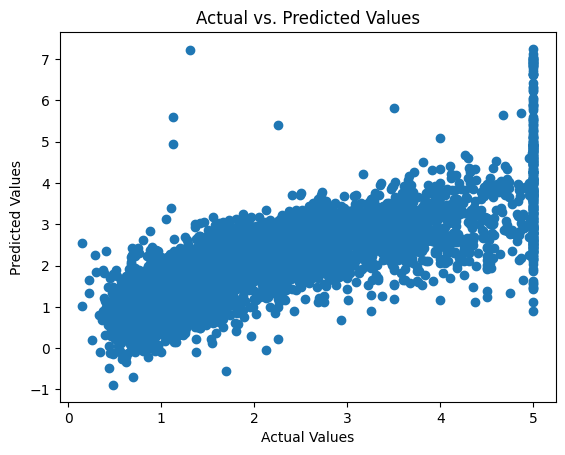

In [71]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [73]:
import pickle

filename = 'model_lr.sav'
pickle.dump(lr_model, open(filename, 'wb'))